# Trabajo Práctico 1 - Aplicaciones Computacionales en Negocios

Este proyecto consiste en analizar y optimizar la performance operativa y económica de dos molinos de vientos dedicados a la generación de energía eléctrica en la Patagonia.

### Datos conocidos

Modelo de viento regional:

Si+1 =Si +κ(θ(ti)−Si)∆+σ√∆Zi

con ∆ = 1/365 y la media estacional θ(ti) = 6 + 2cos(2πi/365).

Modelo para la diferencia de viento entre el molino Norte y el molino Sur:

Di+1=Di−βDi∆+γ√∆Wi

### 1) A partir de la estructura conocida de θ(t), los datos históricos para el viento regional y la diferencia del viento entre ambos molinos, estimamos κ, σ, β y γ a través de regresiones lineales

Importamos las librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import statsmodels.api as sm

Tomamos el excel con los datos historicos del viento

In [2]:
df = pd.read_excel('/Users/kolo400/4to año/Aplicaciones Compuatacionales en negocios/TP1/Wind data for TP1.xlsx')
df

,dia,regional wind,wind gap norte sur
0,1,8.000000,0.000000
1,2,8.346296,0.181523
2,3,10.062316,0.188643
3,4,10.791337,0.071085
4,5,10.754093,0.078442
...,...,...,...
3645,3646,8.642231,-0.869425
3646,3647,6.527408,-1.268447
3647,3648,6.230707,-1.149234
3648,3649,5.550882,-0.420431


Gráfico con el viento regional historico

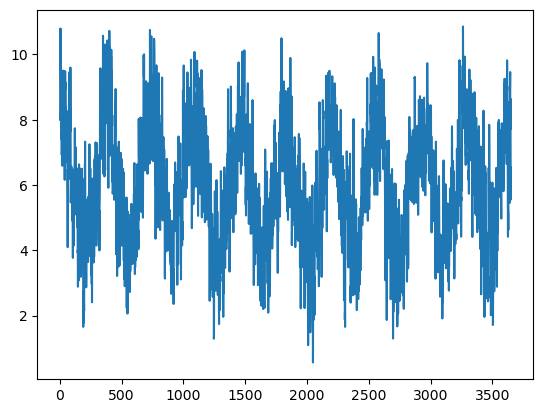

In [3]:
plt.plot(df['dia'],df['regional wind'])

Gráfico con la diferencia historica entre los vientos norte y sur

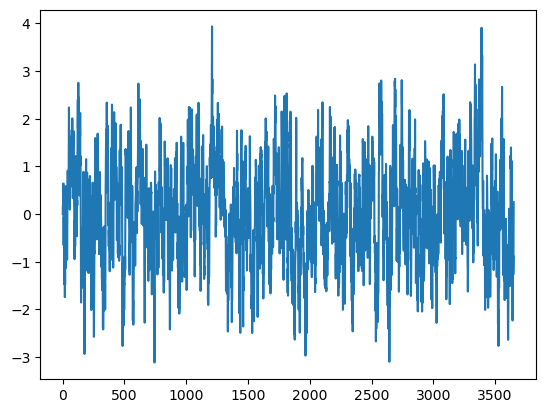

In [4]:
plt.plot(df['dia'],df['wind gap norte sur'])

Definimos la media estacional y también la X y la Y correspondientes de la regresion lineal para estimar κ y σ.

X = θ(ti)−Si)∆

Y = Si+1 - Si

In [5]:
def theta(dia):
    return 6 + 2*np.cos(2*np.pi*dia/365)

X_reg_lineal = np.array((theta(df['dia'].iloc[1:]) - df['regional wind'].iloc[1:])*1/365)
X_1 = X_reg_lineal.reshape(-1, 1)

In [6]:
shifted = df['regional wind'].shift(1) 

Y_1 = df['regional wind'].iloc[1:].reset_index(drop=True) - shifted.iloc[1:].reset_index(drop=True)

#Si+1 - Si shifted tira las filas 1 para abajo

OLS es un método que estima los coeficientes de una regresión lineal minimizando la suma de los cuadrados de los residuos (errores).
Regresión Lineal: La regresión lineal busca ajustar una línea recta que mejor explique la relación entre las variables.
OLS: Es la técnica matemática utilizada para encontrar esa línea recta. Cuando hablamos de realizar una regresión lineal, en la mayoría de los casos estamos refiriéndonos a usar OLS para ajustar el modelo.
OLS (Ordinary Least Squares) es la técnica matemática o el método de optimización que se utiliza para ajustar una regresión lineal. Es decir, cuando hablamos de hacer una regresión lineal, estamos usando OLS para encontrar los coeficientes del modelo que mejor ajustan los datos.

Comentario: Arrancamos desde el dia 2 a calcular ya que necesistas un dia anterior para el modelo osea para Si+1 necesitas Si.

In [7]:

# Asumiendo que ya tienes df cargado y los datos preparados
# Usamos theta(dia) definido como en tu código anterior

# Crear la variable independiente X, ajustando el valor como en tu implementación
X_reg_lineal = np.array((theta(df['dia'].iloc[1:]) - df['regional wind'].iloc[1:]) * 1/365)
#Variable independiente X seria el termino que multiplica kappa
X_1 = X_reg_lineal.reshape(-1, 1)

# Agregar una columna de unos para el intercepto(beta_0)
X_1 = np.hstack([np.ones((X_1.shape[0], 1)), X_1])  # Añadir constante (intercepto)

# Definir la variable dependiente Y
shifted = df['regional wind'].shift(1)
Y_1 = df['regional wind'].iloc[1:].reset_index(drop=True) - shifted.iloc[1:].reset_index(drop=True)
#Si+1-Si
# Convertir Y a un array de numpy para cálculo
Y_1 = Y_1.values.reshape(-1, 1)

# Calcular beta usando la fórmula de regresión lineal manual
X_transpose = X_1.T
beta = np.linalg.inv(X_transpose @ X_1) @ X_transpose @ Y_1 
#Esta expresion sale de minimizar suma de los errores cuadráticos en formato algebra lineal. 
# Y = Beta*X


# Extraer los parámetros kappa e intercepto
intercept = beta[0][0]
kappa = abs(beta[1][0])

print(f"Intercepto: {intercept}")
print(f"Kappa: {kappa}")

Intercepto: 0.010103261623492942
Kappa: 107.77363921678507


In [8]:
residuos = Y_1 - X_1 @ beta  # Donde beta es el vector de coeficientes calculado

# Calcular MSE (Media del Error Cuadrático)
n = len(Y_1)  # Número total de observaciones
m = X_1.shape[1] - 1  # Número de variables independientes sin contar el intercepto
mse_resid = np.sum(residuos**2) / (n - m - 1)

# Calcular la desviación estándar de los residuos
std_error_regression = np.sqrt(mse_resid)

# Ajustar para sigma considerando el modelo temporal
sigma = std_error_regression * np.sqrt(365)

print(f"Desviación Estándar de los Residuos (sigma): {sigma}")

Desviación Estándar de los Residuos (sigma): 16.08115417817645


Porque el error standar de la regresion lineal me sirve para estimar sigma? 
porque con la regresion lineal definida estimamos Y es decir Si+1 - Si con el termino deterministico sacando el termino de ruido/aleatorio. Justamente una vez hecha la regresion linel, que intenta predecir Y con el termuno deerministico, su error estandar es decir basicamente el error en la prediccion va a ser justamente la variabildiad que el modelo no puede explicar con solo el termino deterministico, y esta variabildiad que el modelo no puede explicar va a ser el sigma en freuencia diaria, y no incluye el Z ya que este Z es una V.A que es el ruido no predecible.

Repetimos mismo razonamiento que el anterior para estimar β y γ

In [9]:
#Forma Manual: 

# Asumiendo que ya tienes df cargado y los datos preparados
# Usamos theta(dia) definido como en tu código anterior

shifted_2 = df['wind gap norte sur'].shift(1) 
X_2 = np.array(df['wind gap norte sur'].iloc[1:]*1/365)
X_2 = X_2.reshape(-1, 1)
X_2 = np.hstack([np.ones((X_2.shape[0], 1)), X_2])
Y_2 = df['wind gap norte sur'].iloc[1:].reset_index(drop=True) - shifted_2.iloc[1:].reset_index(drop=True)
#Si+1-Si
# Convertir Y a un array de numpy para cálculo
Y_2 = Y_2.values.reshape(-1, 1)

# Calcular beta usando la fórmula de regresión lineal manual
X_2_transpose = X_2.T
beta_2 = np.linalg.inv(X_2_transpose @ X_2) @ X_2_transpose @ Y_2
#Esta expresion sale de minimizar suma de los errores cuadráticos en formato algebra lineal. 
# Y = Beta*X


# Extraer los parámetros kappa e intercepto
intercept = beta_2[0][0]
beta = beta_2[1][0]

print(f"beta: {beta}")

beta: 48.380963953447036


In [10]:
residuos_2 = Y_2 - X_2 @ beta_2  # Donde beta es el vector de coeficientes calculado

# Calcular MSE (Media del Error Cuadrático)
n_2 = len(Y_2)  # Número total de observaciones
m_2 = X_2.shape[1] - 1  # Número de variables independientes sin contar el intercepto
mse_resid_2 = np.sum(residuos_2**2) / (n_2 - m_2 - 1)

# Calcular la desviación estándar de los residuos
std_error_regression_2 = np.sqrt(mse_resid_2)

# Ajustar para sigma considerando el modelo temporal
gamma = std_error_regression_2 * np.sqrt(365)

print(f"Desviación Estándar de los Residuos (gamma): {gamma}")

Desviación Estándar de los Residuos (gamma): 10.09342856152689


### 2) A partir de los parámetros estimados implementamos una simulación diaria simultánea para el viento en cada molino durant el plazo de un año

In [11]:
from tqdm import tqdm
M = 500000
S0 = 8 #Media estacional en i = 1 es aproximadamente 8
trayectoria_norte = np.zeros((M, 365))
trayectoria_sur = np.zeros((M, 365))
trayectoria_norte[:,0] = S0
trayectoria_sur[:,0] = S0
trayectoria_norte_negado = np.zeros((M, 365))
trayectoria_sur_negado = np.zeros((M, 365))
trayectoria_norte_negado[:,0] = S0
trayectoria_sur_negado[:,0] = S0

trayectoria_dif = np.zeros((M, 365))
for i in tqdm(range(M)):
    for j in range(1,365):
        Z = np.random.normal(0, 1)
        W = np.random.normal(0, 1)
        trayectoria_dif[i][j] =  trayectoria_dif[i][j-1] - beta*trayectoria_dif[i][j-1]*1/365+ gamma*np.sqrt(1/365)*W
        trayectoria_norte[i][j] =  trayectoria_norte[i][j-1] + kappa*(theta(j) - trayectoria_norte[i][j-1])*1/365 + sigma * np.sqrt(1/365) * Z + trayectoria_dif[i][j]/2
        trayectoria_sur[i][j] =  trayectoria_sur[i][j-1] + kappa*(theta(j) - trayectoria_sur[i][j-1])*1/365 + sigma *np.sqrt(1/365) * Z - trayectoria_dif[i][j]/2
        trayectoria_norte_negado[i][j] =  trayectoria_norte_negado[i][j-1] + kappa*(theta(j) - trayectoria_norte_negado[i][j-1])*1/365 + sigma *np.sqrt(1/365) * -Z + trayectoria_dif[i][j]/2
        trayectoria_sur_negado[i][j] =  trayectoria_sur_negado[i][j-1] + kappa*(theta(j) - trayectoria_sur_negado[i][j-1])*1/365 + sigma *np.sqrt(1/365) * -Z - trayectoria_dif[i][j]/2

100%|██████████████████████████████████| 500000/500000 [22:07<00:00, 376.56it/s]


Asumimos que la diferencia en el GAP esta distribuida equitativamente

In [12]:
df['viento_norte'] = df['regional wind'] + df['wind gap norte sur']/2
df['viento_sur'] = df['regional wind'] - df['wind gap norte sur']/2
df

,dia,regional wind,wind gap norte sur,viento_norte,viento_sur
0,1,8.000000,0.000000,8.000000,8.000000
1,2,8.346296,0.181523,8.437058,8.255535
2,3,10.062316,0.188643,10.156637,9.967994
3,4,10.791337,0.071085,10.826879,10.755794
4,5,10.754093,0.078442,10.793314,10.714872
...,...,...,...,...,...
3645,3646,8.642231,-0.869425,8.207519,9.076944
3646,3647,6.527408,-1.268447,5.893184,7.161631
3647,3648,6.230707,-1.149234,5.656090,6.805324
3648,3649,5.550882,-0.420431,5.340667,5.761097


In [13]:
promedio_norte = trayectoria_norte.mean(axis=0)
promedio_sur = trayectoria_sur.mean(axis=0)
promedio_dif = trayectoria_dif.mean(axis = 0)

#### Gráficos para confirmar que los caminos simulados se parecen a la data histórica.

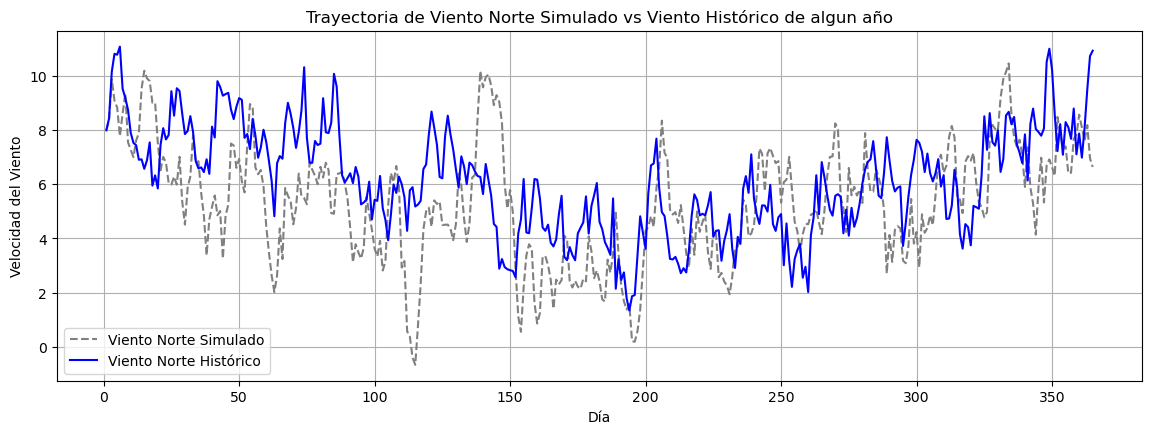

In [14]:
plt.figure(figsize=(14, 10))

# Primer gráfico: Trayectoria de viento Norte simulado vs Viento Norte Histórico de algun año
plt.subplot(2, 1, 1)
plt.plot(list(range(1,366)),trayectoria_norte[19], label='Viento Norte Simulado', linestyle='--', color='grey')
plt.plot(list(range(1,366)), df['viento_norte'][0:365], label='Viento Norte Histórico', linestyle='-', color='blue')
plt.xlabel('Día')
plt.ylabel('Velocidad del Viento')
plt.title('Trayectoria de Viento Norte Simulado vs Viento Histórico de algun año')
plt.legend()
plt.grid(True)

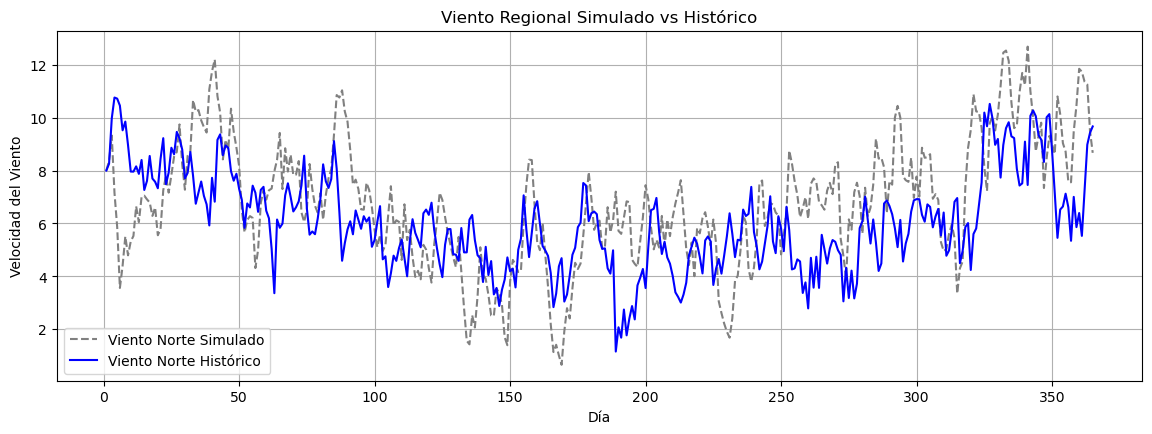

In [15]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(list(range(1,366)),trayectoria_sur[19], label='Viento Norte Simulado', linestyle='--', color='grey')
plt.plot(list(range(1,366)), df['viento_sur'][0:365], label='Viento Norte Histórico', linestyle='-', color='blue')
plt.xlabel('Día')
plt.ylabel('Velocidad del Viento')
plt.title('Viento Regional Simulado vs Histórico')
plt.legend()
plt.grid(True)


Primero y principal comparamos una trayectoria individual de una simulacion cualquiera con la data historica de algun año de los 10 de forma de ver si las trayectorias de forma individual estas siendo generadas de forma acorde a la variable que queremos modelar que en este caso es la velocidad de viento norte y sur. 

En la comparación de una trayectoria individual simulada con un año específico de datos históricos del viento norte y sur, observamos que ambas trayectorias presentan un comportamiento cíclico con una tendencia descendente y luego ascendente a lo largo del año, capturando correctamente la estacionalidad del viento. Sin embargo, también se evidencian divergencias a corto plazo entre la simulación y los datos históricos, como momentos donde la trayectoria simulada sube mientras la histórica baja, y desincronización en picos y valles. Esto refleja la influencia de los shocks aleatorios en la simulación.

Estas diferencias no implican que el modelo esté descalibrado, sino que destacan las limitaciones inherentes a replicar exactamente los valores históricos con una sola simulación. A pesar de estas desviaciones, la simulación capta adecuadamente la estacionalidad y la tendencia general del viento, lo cual sugiere que el modelo está bien calibrado.




In [16]:
wind_data_norte = df['viento_norte']
wind_data_sur = df['viento_sur']
wind_data_gap = df['wind gap norte sur']
# Convertir la serie a un arreglo de 10 años con 365 días por año
wind_matrix_norte = wind_data_norte.values.reshape(-1, 365)
wind_matrix_sur = wind_data_sur.values.reshape(-1, 365)
wind_matrix_gap = wind_data_gap.values.reshape(-1, 365)
# Calcular el promedio a lo largo de los 10 años para cada día del año
average_annual_wind_norte = wind_matrix_norte.mean(axis=0)
average_annual_wind_sur = wind_matrix_sur.mean(axis=0)
average_annual_wind_gap = wind_matrix_gap.mean(axis=0)
# Crear un DataFrame para visualizar o usar el promedio anual
average_annual_df = pd.DataFrame({
    'Dia': np.arange(1, 366),  # Días del año
    'Promedio Anual Norte': average_annual_wind_norte,
    'Promedio Anual Sur': average_annual_wind_sur,
    'Promedio Gap': average_annual_wind_gap
})

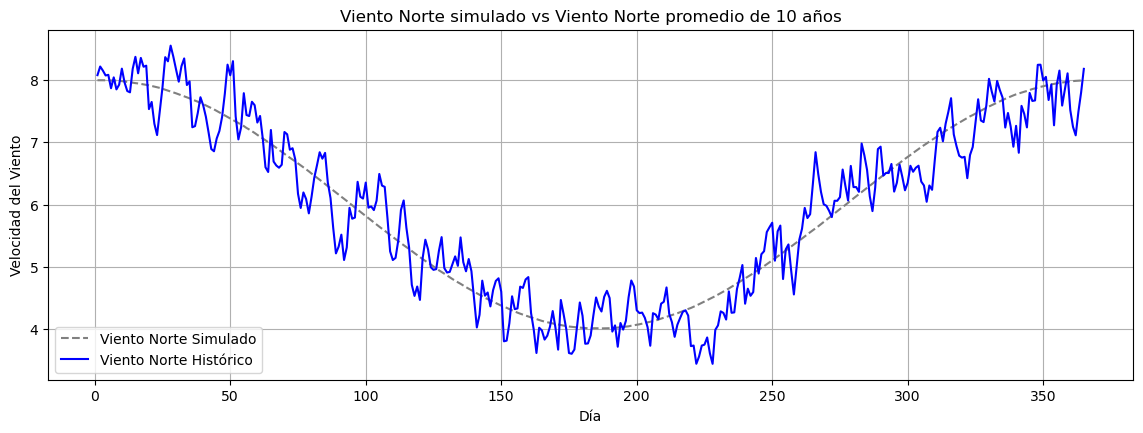

In [17]:
plt.figure(figsize=(14, 10))

# Primer gráfico: Viento Norte promedio Simulado vs Viento promedio Histórico
plt.subplot(2, 1, 1)
plt.plot(list(range(1,366)),promedio_norte, label='Viento Norte Simulado', linestyle='--', color='grey')
plt.plot(list(range(1,366)), average_annual_df['Promedio Anual Norte'], label='Viento Norte Histórico', linestyle='-', color='blue')
plt.xlabel('Día')
plt.ylabel('Velocidad del Viento')
plt.title('Viento Norte simulado vs Viento Norte promedio de 10 años')
plt.legend()
plt.grid(True)

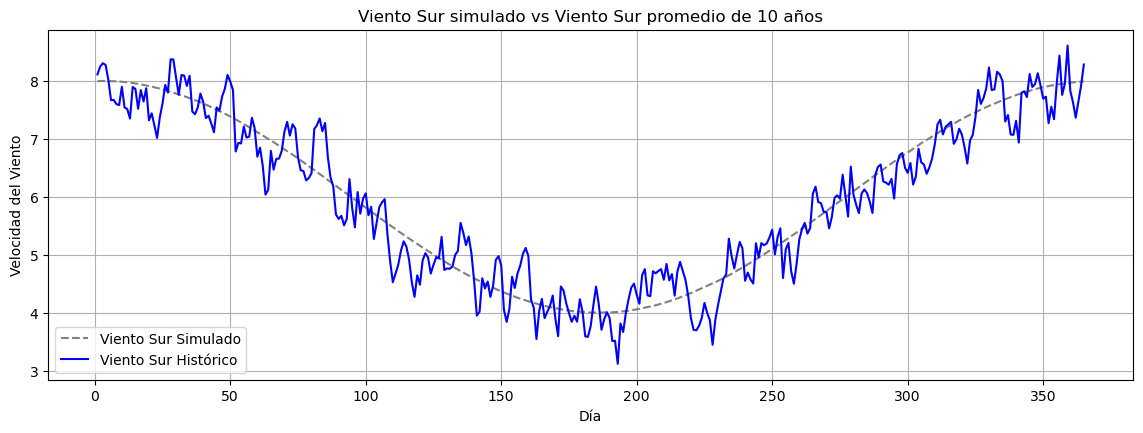

In [18]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(list(range(1,366)),promedio_sur, label='Viento Sur Simulado', linestyle='--', color='grey')
plt.plot(list(range(1,366)), average_annual_df['Promedio Anual Sur'], label='Viento Sur Histórico', linestyle='-', color='blue')
plt.xlabel('Día')
plt.ylabel('Velocidad del Viento')
plt.title('Viento Sur simulado vs Viento Sur promedio de 10 años')
plt.legend()
plt.grid(True)

Tendencia y Estacionalidad: El gráfico muestra que las simulaciones capturan de manera efectiva la tendencia y la estacionalidad del viento. Ambas líneas siguen un patrón cíclico que refleja la variación estacional a lo largo del año, con un descenso a mediados del año y un aumento hacia el final. Esto indica que el modelo está correctamente calibrado en cuanto a la tendencia estacional y los patrones de variación esperados.

Consistencia de Magnitud: Aunque hay pequeñas diferencias en la magnitud de las variaciones diarias, las simulaciones se mantienen dentro de un rango razonable de los datos históricos. Las desviaciones entre las simulaciones y los datos reales son esperadas debido a la naturaleza estocástica del modelo y a la presencia de ruido aleatorio que no puede ser predicho con exactitud.

Evaluación del Modelo: Gráficamente, podemos observar que tanto para el viento norte como para el viento sur, el modelo captura de manera correcta la dirección y la estacionalidad de los vientos. Esto sugiere que, a nivel de promedio, el modelo está bien ajustado y reproduce adecuadamente el comportamiento general del viento en la región, cumpliendo con las expectativas de un modelo calibrado.

Conclusión Final: Dado que el promedio de las simulaciones se ajusta bien a los patrones observados en los datos históricos, se puede concluir que el modelo está correctamente calibrado para capturar la dinámica del viento. Esto valida el uso del modelo para simulaciones futuras, aunque siempre es importante recordar que variaciones individuales pueden no coincidir exactamente con los datos reales debido a la aleatoriedad inherente del proceso.

#### Comparaciones estadísticas para confirmar que los caminos simulados se parecen a la data histórica.

5.9798355927901286
6.000654149694802
1.893236826313806
2.381490667084781


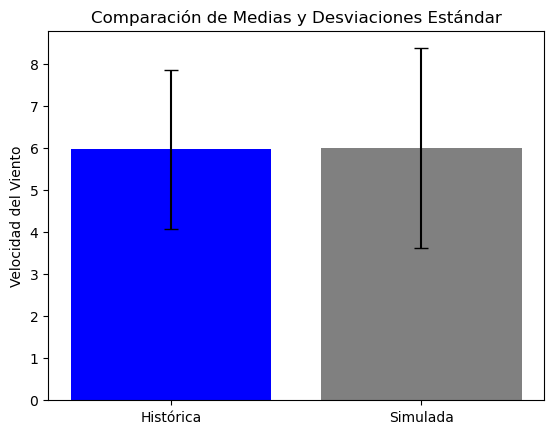

In [19]:
media_historica = df['viento_norte'].mean()
media_simulada = trayectoria_norte.mean()

print(media_historica)
print(media_simulada)

std_historica = df['viento_norte'].std()
std_simulada = trayectoria_norte.std()

print(std_historica)
print(std_simulada)

plt.bar(['Histórica', 'Simulada'], [media_historica, media_simulada], yerr=[std_historica, std_simulada], capsize=5, color=['blue', 'grey'])
plt.ylabel('Velocidad del Viento')
plt.title('Comparación de Medias y Desviaciones Estándar')
plt.show()

5.949050051765316
5.999653678645742
1.893236826313806
2.381490667084781


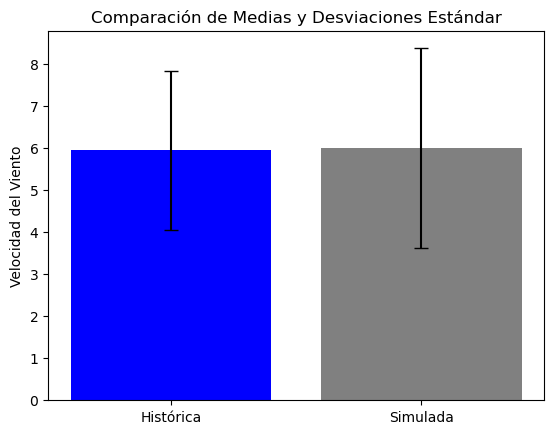

In [20]:
media_historica = df['viento_sur'].mean()
media_simulada = trayectoria_sur.mean()

print(media_historica)
print(media_simulada)

std_historica = df['viento_norte'].std()
std_simulada = trayectoria_norte.std()

print(std_historica)
print(std_simulada)

plt.bar(['Histórica', 'Simulada'], [media_historica, media_simulada], yerr=[std_historica, std_simulada], capsize=5, color=['blue', 'grey'])
plt.ylabel('Velocidad del Viento')
plt.title('Comparación de Medias y Desviaciones Estándar')
plt.show()

En el gráfico que compara la media y la desviación estándar de las velocidades del viento históricas y simuladas, podemos observar que:

Medias Similares: Las barras muestran que la media de la velocidad del viento en la simulación es muy cercana a la media histórica, lo que indica que el modelo está capturando adecuadamente el valor esperado de la velocidad del viento.

Desviación Estándar Mayor en la Simulación: La desviación estándar (representada por las líneas de error) es mayor en las simulaciones comparadas con los datos históricos. Esto refleja una mayor variabilidad en las simulaciones.

Razón de la Variabilidad Mayor en la Simulación: La mayor desviación estándar en las simulaciones puede atribuirse a la naturaleza estocástica del modelo. Las simulaciones incluyen componentes aleatorios, como shocks o ruidos normales, que añaden variabilidad a las trayectorias. En los datos históricos, esta variabilidad está moderada por factores reales del entorno que no siempre se capturan en el modelo.

Conclusión Final: El modelo simula adecuadamente la tendencia central (media) de la velocidad del viento, lo cual es una señal positiva de calibración. Sin embargo, la mayor variabilidad observada en las simulaciones es un efecto esperado debido a los componentes aleatorios inherentes al proceso de simulación y no necesariamente indica un problema en la calibración del modelo. Esto sugiere que el modelo es capaz de capturar la estacionalidad y la tendencia, aunque con una dispersión más amplia debido a la aleatoriedad.

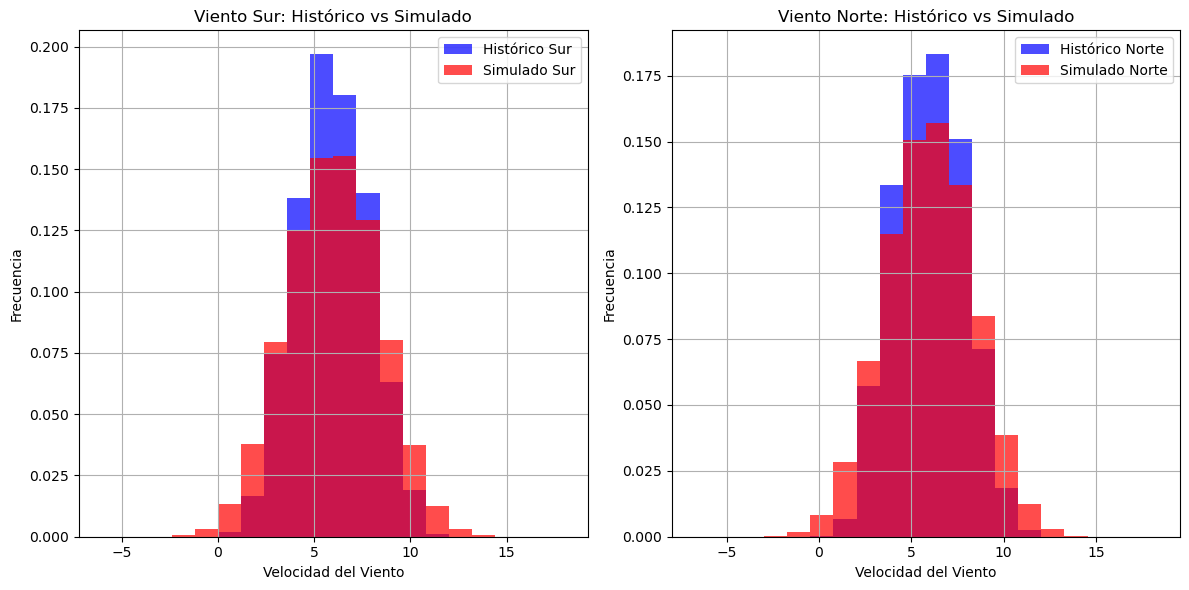

In [21]:
import matplotlib.pyplot as plt

# Aplanar los datos simulados para Sur y Norte si son arrays de trayectorias
datos_simulados_sur = trayectoria_sur.flatten()
datos_simulados_norte = trayectoria_norte.flatten()

# Definir el número de bins y los límites comunes para ambos histogramas de Sur
bins = 20
rango_sur = (min(min(df['viento_sur']), min(datos_simulados_sur)), max(max(df['viento_sur']), max(datos_simulados_sur)))

# Definir el número de bins y los límites comunes para ambos histogramas de Norte
rango_norte = (min(min(df['viento_norte']), min(datos_simulados_norte)), max(max(df['viento_norte']), max(datos_simulados_norte)))

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Graficar histogramas para el viento Sur
ax1.hist(df['viento_sur'], bins=bins, range=rango_sur, alpha=0.7, color='blue', label='Histórico Sur', density=True)
ax1.hist(datos_simulados_sur, bins=bins, range=rango_sur, alpha=0.7, color='red', label='Simulado Sur', density=True)
ax1.set_xlabel('Velocidad del Viento')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Viento Sur: Histórico vs Simulado')
ax1.legend()
ax1.grid(True)

# Graficar histogramas para el viento Norte
ax2.hist(df['viento_norte'], bins=bins, range=rango_norte, alpha=0.7, color='blue', label='Histórico Norte', density=True)
ax2.hist(datos_simulados_norte, bins=bins, range=rango_norte, alpha=0.7, color='red', label='Simulado Norte', density=True)
ax2.set_xlabel('Velocidad del Viento')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Viento Norte: Histórico vs Simulado')
ax2.legend()
ax2.grid(True)

# Mostrar la figura
plt.tight_layout()
plt.show()

En los gráficos del viento Sur y Norte, observamos que tanto las simulaciones como los datos históricos presentan una forma acampanada, similar a una distribución normal. Las simulaciones muestran una mayor dispersión y valores más extremos, lo cual se puede atribuir a la influencia de los shocks aleatorios en el modelo. En cambio, los datos históricos están más concentrados alrededor de la media, reflejando menor variabilidad y menos extremos.

A pesar de estas diferencias en la dispersión, ambas distribuciones (simuladas e históricas) comparten una forma general similar, con medias casi idénticas. La mayor variabilidad en las simulaciones es esperada debido a la naturaleza aleatoria de las variables que las componen. Esto sugiere que el modelo captura adecuadamente la estructura básica y la estacionalidad del comportamiento del viento, aunque muestra una tendencia a amplificar los extremos.

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Supongamos que 'viento_historico_norte' y 'viento_simulado_norte' contienen los datos históricos y simulados, respectivamente.
viento_historico_norte = average_annual_df['Promedio Anual Norte']
viento_simulado_norte = promedio_norte # Asegúrate de que 'promedio_norte' contenga el promedio de tus simulaciones

# Cálculo del MAE y MSE
mae_norte = mean_absolute_error(viento_historico_norte, viento_simulado_norte)
mse_norte = mean_squared_error(viento_historico_norte, viento_simulado_norte)

print(f"Error Medio Absoluto (MAE) para el Viento Norte: {mae_norte}")
print(f"Error Cuadrático Medio (MSE) para el Viento Norte: {mse_norte}")

# Repite lo mismo para el Viento Sur
viento_historico_sur = average_annual_df['Promedio Anual Sur']
viento_simulado_sur = promedio_sur  # Asegúrate de que 'promedio_sur' contenga el promedio de tus simulaciones

# Cálculo del MAE y MSE para el viento sur
mae_sur = mean_absolute_error(viento_historico_sur, viento_simulado_sur)
mse_sur = mean_squared_error(viento_historico_sur, viento_simulado_sur)

print(f"Error Medio Absoluto (MAE) para el Viento Sur: {mae_sur}")
print(f"Error Cuadrático Medio (MSE) para el Viento Sur: {mse_sur}")

Error Medio Absoluto (MAE) para el Viento Norte: 0.33263051069672456
Error Cuadrático Medio (MSE) para el Viento Norte: 0.16868421547700543
Error Medio Absoluto (MAE) para el Viento Sur: 0.3211717828296554
Error Cuadrático Medio (MSE) para el Viento Sur: 0.15712745334352202


### Nuevos Datos

- El ingreso diario generado es 1000 ∗ Si dólares si el molino está prendido ese día
- La probabilidad de que el molino se rompa en el día i, si estaba activo en el día i − 1, es 0.25 ∗ S(i)2∆
- Costo de arreglo = 200.000 dólres
- Cada vez que el viento supera un umbral K se apagará el molino si estaba prendido. Y cada vez que el viento descienda a través del mismo umbral deberá prenderse si estaba apagado.
- Costo de apagado = 1000 dólres
- Prenderlo no cuesta nada.
- Tasa de interés es del 5%

### 3 y 4) Implementamos una simulación para la evolución simultánea del viento en cada molino, las roturas, las decisiones de apagado y encendido, y la acumulación de cashflows en el tiempo y graficamos la evolución contemporánea del estado de cada molino

100%|█████████████████████████████████| 500000/500000 [02:25<00:00, 3427.26it/s]


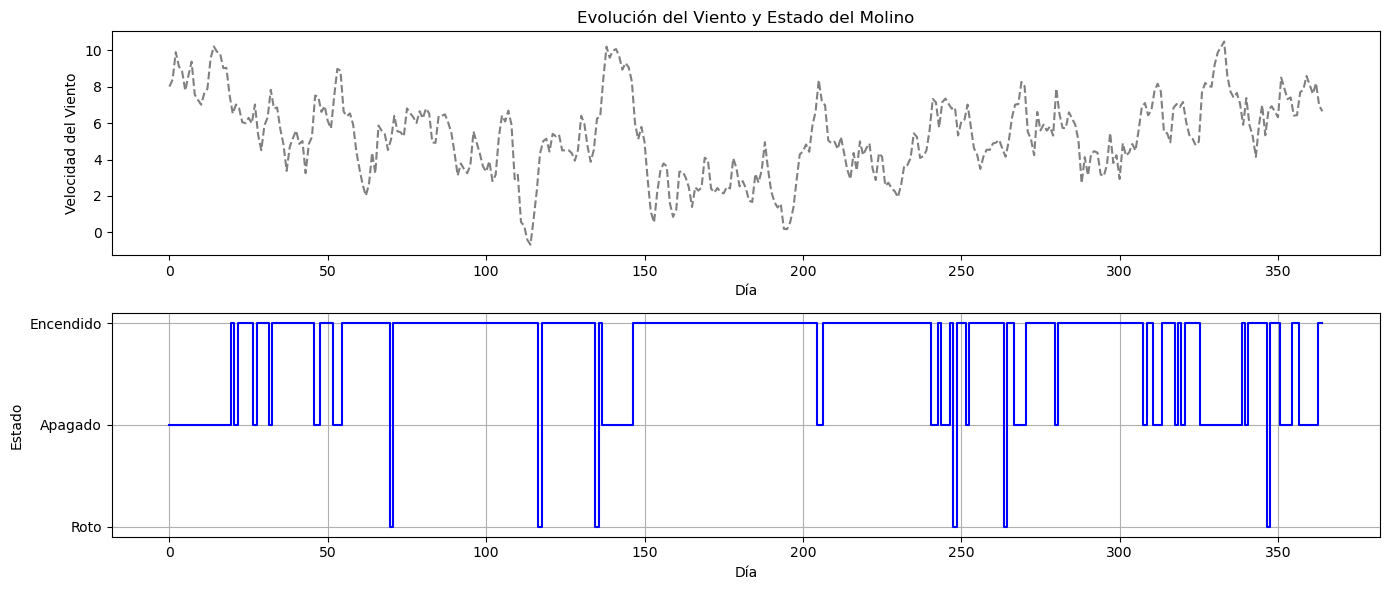

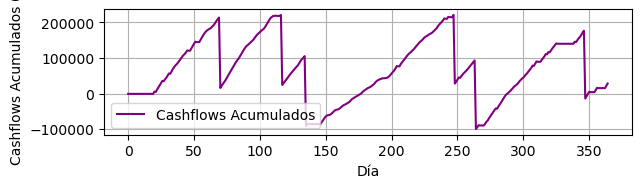

In [23]:
import numpy as np
import matplotlib.pyplot as plt

K = 7 # Valor de K, ajusta según sea necesario
dias = 365  # Días del año
costo = 200000
# Inicializa arrays para ingresos y costos
ingresos_totales = np.zeros(M)


# Función de simulación completa
def simular_molino(trayectoria_viento, K, costo_de_arreglo):
    estado_molino = []  # Guarda el estado del molino (1 = encendido, 0 = apagado, -1 = roto)
    molino_encendido = True
    estado_anterior = False  # Comienza en False, porque el primer día no hay un estado anterior
    cashflows = []
    ingresos_totales = 0
    costos_totales = 0
    roturas = 0
    encendidos = 0
    apagados = 0

    for dia in range(len(trayectoria_viento)):
        viento = trayectoria_viento[dia]
        ingresos = 0
        costos = 0
        # Decisión de apagado/encendido según K
        if molino_encendido and viento > K:
            molino_encendido = False
            costos += 1000  # Costo de apagar
            

        elif not molino_encendido and viento < K:
            molino_encendido = True  # Encender no tiene costo
            encendidos += 1

        # Calcula la probabilidad de falla si el molino estaba encendido el día anterior
        if molino_encendido:
            prob_falla = 0.25 * (viento ** 2) * (1 / 365)
            falla = np.random.rand() < prob_falla

            if falla and estado_anterior:
                molino_encendido = False
                costos += costo_de_arreglo# Costo de la falla
                estado_molino.append(-1)  # El molino se rompe este día
                roturas += 1
            else:
                ingresos += 1000 * viento  # Ingresos si no falla y está encendido
                estado_molino.append(1)  # El molino está encendido y operativo
        else:
            estado_molino.append(0)  # Apagado ya que no esta encendido
            
        if not molino_encendido:
            apagados += 1
        # El molino roto se arregla al siguiente día
        estado_anterior = molino_encendido  # Actualiza para el próximo día
        
        ingresos_totales += ingresos
        costos_totales += costos
        # Aplicar factor de descuento para el cashflow diario
        descuento = np.exp(-0.05 * dia / 365)
        cashflows.append((ingresos - costos) * descuento)

    return ingresos_totales-costos_totales, roturas, estado_molino, cashflows, apagados

# Corre la simulación para todas las trayectorias y acumula resultados
todos_cashflows_norte = []
todos_estados_norte = []
for sim in tqdm(range(M)):
    ingresos_norte, roturas_norte, estado_norte, cashflows_norte,apagados_norte = simular_molino(trayectoria_norte[sim], K,costo)
    ingresos_totales[sim] = ingresos_norte
    todos_cashflows_norte.append(cashflows_norte)
    todos_estados_norte.append(estado_norte)
    

# Visualización de una trayectoria específica y su estado de molino
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(trayectoria_norte[19], label='Viento Norte Simulado', linestyle='--', color='grey')
plt.title('Evolución del Viento y Estado del Molino')
plt.xlabel('Día')
plt.ylabel('Velocidad del Viento')

plt.subplot(2, 1, 2)
plt.step(range(dias), todos_estados_norte[19], where='mid', label='Estado Molino', color='blue')
plt.xlabel('Día')
plt.ylabel('Estado')
plt.yticks([-1, 0, 1], ['Roto', 'Apagado', 'Encendido'])
plt.grid(True)
plt.tight_layout()
plt.show()


cashflows_simulados = todos_cashflows_norte[19]
cashflows_acumulados = [sum(cashflows_simulados[:i+1]) for i in range(len(cashflows_simulados))]


plt.subplot(3, 1, 3)
plt.plot(cashflows_acumulados, label='Cashflows Acumulados', color='purple')
plt.xlabel('Día')
plt.ylabel('Cashflows Acumulados ($)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Veamoslo en un periodo mas chico para poder ver si tiene sentido la comparacion evolucio del viento en el tiempo y evolucion de estados.
Se puede ver que se esta siguendo la politia de forma correcta si la velocidad del viento supera el threshold de velocidad encontrado se apaga y si esta por debajo del threshold se prende. 
Hagamos esto mismo pero para un periodo donde veamos que si se rompio el molino y ver si esto tiene sentido 

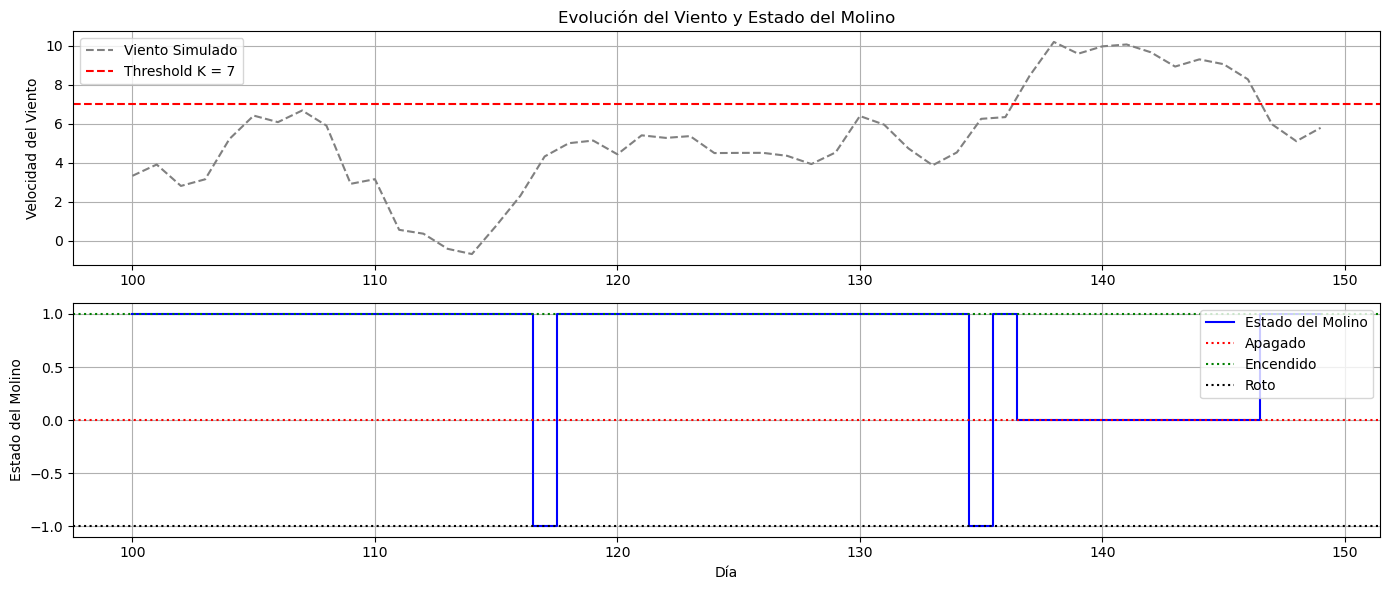

In [24]:
# Seleccionar una simulación típica (puedes ajustar el índice para ver otras simulaciones)
simulacion_index = 19  # Índice de la simulación que deseas visualizar

# Extraer los datos del periodo definido
viento_simulado = trayectoria_norte[simulacion_index][100:150]
estado_molino = todos_estados_norte[simulacion_index][100:150]  # Asegúrate de tener guardados los estados

# Crear un gráfico con dos subplots
plt.figure(figsize=(14, 6))

# Gráfico del viento simulado
plt.subplot(2, 1, 1)
plt.plot(range(100,150), viento_simulado, label='Viento Simulado', color='grey', linestyle='--')
plt.axhline(K, color='red', linestyle='--', label=f'Threshold K = {K}')  # Agregar línea del umbral
plt.ylabel('Velocidad del Viento')
plt.title(f'Evolución del Viento y Estado del Molino')
plt.grid(True)
plt.legend()

# Gráfico del estado del molino
plt.subplot(2, 1, 2)
plt.step(range(100,150), estado_molino, where='mid', label='Estado del Molino', color='blue')
plt.axhline(0, color='red', linestyle=':', label='Apagado')
plt.axhline(1, color='green', linestyle=':', label='Encendido')
plt.axhline(-1, color='black', linestyle=':', label='Roto')
plt.xlabel('Día')
plt.ylabel('Estado del Molino')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

Como vemos en este grafico se rompe el molino en un momento donde el viento esta dentro del threshold lo cual tiene sentido porque la rotura del molino se dara unicamente si el molino esta prendido y el dia anterio estaba prendido. Vemos que se cumple eso. Se puede ver que no es la velocidad esta dentro de todo cercana al threshold valiendo aprox 5,6 siendo el threshold 7.

Mismo para viento Sur: 

100%|█████████████████████████████████| 500000/500000 [02:29<00:00, 3345.59it/s]


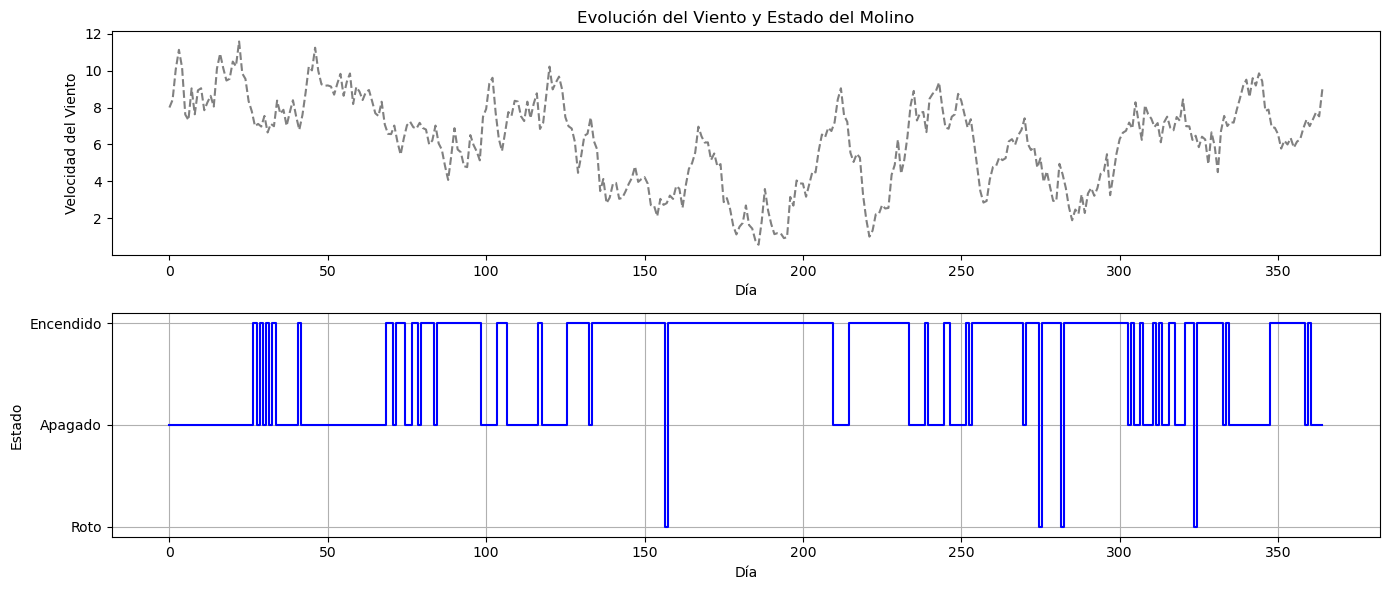

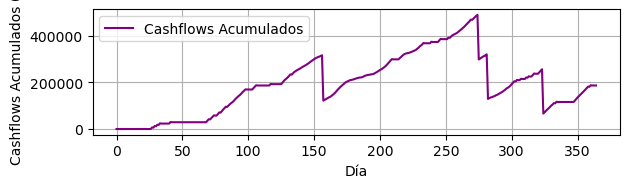

In [25]:
# Inicializa arrays para ingresos y costos
ingresos_totales_2 = np.zeros(M)


# Corre la simulación para todas las trayectorias y acumula resultados
todos_cashflows_sur = []
todos_estados_sur = []
for sim in tqdm(range(M)):
    ingresos_sur, roturas, estado_sur, cashflows_sur,apagados_sur = simular_molino(trayectoria_sur[sim], K,costo)
    ingresos_totales[sim] = ingresos_sur
    todos_cashflows_sur.append(cashflows_sur)
    todos_estados_sur.append(estado_sur)
    

# Visualización de una trayectoria específica y su estado de molino
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(trayectoria_sur[0], label='Viento Sur Simulado', linestyle='--', color='grey')
plt.title('Evolución del Viento y Estado del Molino')
plt.xlabel('Día')
plt.ylabel('Velocidad del Viento')

plt.subplot(2, 1, 2)
plt.step(range(dias), todos_estados_sur[0], where='mid', label='Estado Molino', color='blue')
plt.xlabel('Día')
plt.ylabel('Estado')
plt.yticks([-1, 0, 1], ['Roto', 'Apagado', 'Encendido'])
plt.grid(True)
plt.tight_layout()
plt.show()


cashflows_simulados_sur = todos_cashflows_sur[0]
cashflows_acumulados_sur = [sum(cashflows_simulados_sur[:i+1]) for i in range(len(cashflows_simulados_sur))]


plt.subplot(3, 1, 3)
plt.plot(cashflows_acumulados_sur, label='Cashflows Acumulados', color='purple')
plt.xlabel('Día')
plt.ylabel('Cashflows Acumulados ($)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

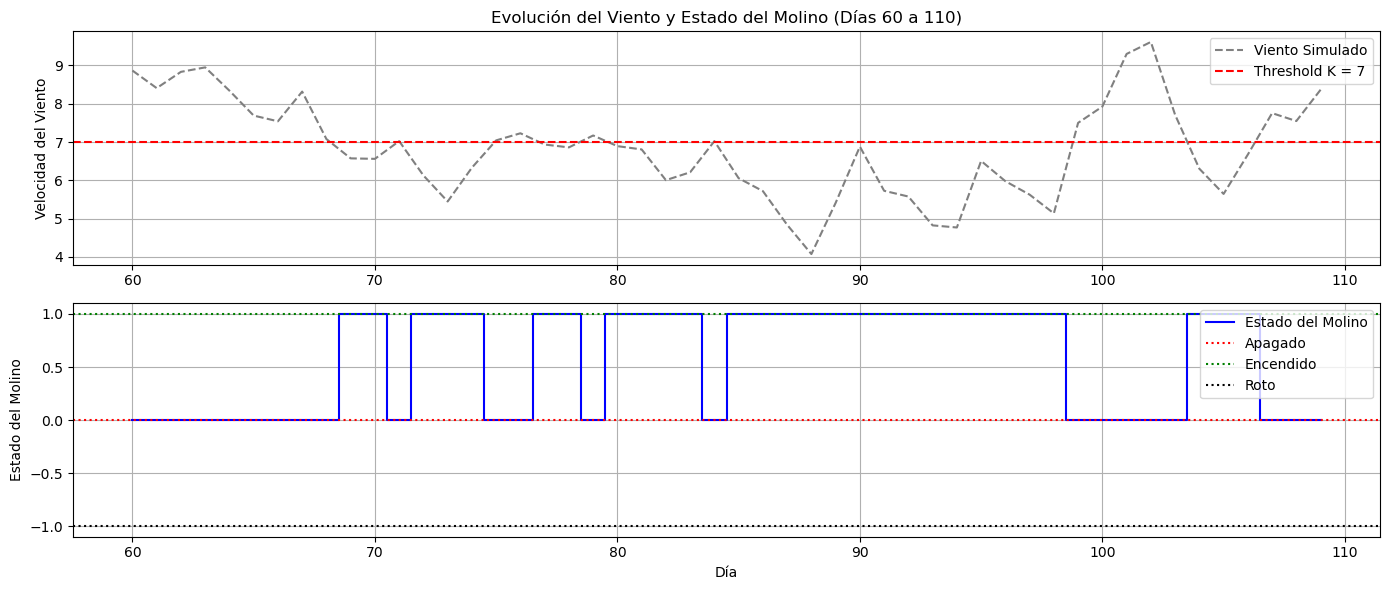

In [26]:
# Seleccionar una simulación típica (puedes ajustar el índice para ver otras simulaciones)
simulacion_index = 0  # Índice de la simulación que deseas visualizar

# Extraer los datos del periodo definido
viento_simulado = trayectoria_sur[simulacion_index][60:110]
estado_molino = todos_estados_sur[simulacion_index][60:110]  # Asegúrate de tener guardados los estados

# Crear un gráfico con dos subplots
plt.figure(figsize=(14, 6))

# Gráfico del viento simulado
plt.subplot(2, 1, 1)
plt.plot(range(60,110), viento_simulado, label='Viento Simulado', color='grey', linestyle='--')
plt.axhline(K, color='red', linestyle='--', label=f'Threshold K = {K}')  # Agregar línea del umbral
plt.ylabel('Velocidad del Viento')
plt.title(f'Evolución del Viento y Estado del Molino (Días 60 a 110)')
plt.grid(True)
plt.legend()

# Gráfico del estado del molino
plt.subplot(2, 1, 2)
plt.step(range(60,110), estado_molino, where='mid', label='Estado del Molino', color='blue')
plt.axhline(0, color='red', linestyle=':', label='Apagado')
plt.axhline(1, color='green', linestyle=':', label='Encendido')
plt.axhline(-1, color='black', linestyle=':', label='Roto')
plt.xlabel('Día')
plt.ylabel('Estado del Molino')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

### 5) Calcula el VAN esperado de los molinos como función del umbral de apagado y encendido.

In [27]:
def calcular_VAN_y_error(cashflows_sur,cashflows_norte):
    cashflows = [sum(c1) + sum(c2)  for c1,c2 in zip(cashflows_sur,cashflows_norte)]
    van_promedio = np.mean(cashflows)
    # Cálculo del error estándar del VAN
    error_estandar = np.sqrt(np.mean([c**2 for c in cashflows]) - van_promedio**2) / np.sqrt(len(cashflows))
    return van_promedio, error_estandar

van_promedio, error_estandar = calcular_VAN_y_error(todos_cashflows_sur,todos_cashflows_norte)
print(f"K usado para los dos molinos: = {K}: VAN = {van_promedio}, Error Estándar = {error_estandar}")

K usado para los dos molinos: = 7: VAN = 798840.3343361039, Error Estándar = 712.5068657242019


Hay que tener en cuenta que dependera del K el VAN que obtengamos para cada molino. Y todavia no buscamos el optimio K por eso usamos un K = 7, como si fuera el standar. Pero segun K que eligamos cambiara el resultado. 



In [28]:
IC_95_VAN = (van_promedio-1.96*error_estandar,van_promedio+1.96*error_estandar)
print(f'Intervalo de confianza 95% del viento del norte: {IC_95_VAN}')

Intervalo de confianza 95% del viento del norte: (797443.8208792844, 800236.8477929233)


Realizamos un computational trick de forma de reducir el error estandar en la estimacion.

In [29]:
def calcular_VAN_promedio_trick(trayectoria_n,trayectoria_s,trayectoria_n_negada,trayectoria_s_negada,K,costo_arreglo):
    todos_cashflows_norte = []
    todos_cashflows_sur = []
    todos_cashflows_norte_negado = []
    todos_cashflows_sur_negado = []
    for sim in tqdm(range(M)):
        # Ejecutar la simulación para la trayectoria del viento y el umbral K
        _,_,_ ,cashflows_norte, _ = simular_molino(trayectoria_n[sim], K,costo_arreglo)
        _,_,_ ,cashflows_sur, _ = simular_molino(trayectoria_s[sim], K,costo_arreglo)
        _,_,_ ,cashflows_norte_negado, _ = simular_molino(trayectoria_n_negada[sim], K,costo_arreglo)
        _,_,_ ,cashflows_sur_negado, _ = simular_molino(trayectoria_s_negada[sim], K,costo_arreglo)
        todos_cashflows_norte.append(cashflows_norte)
        todos_cashflows_sur.append(cashflows_sur)
        todos_cashflows_norte_negado.append(cashflows_norte_negado)
        todos_cashflows_sur_negado.append(cashflows_sur_negado)
    VAN_simulaciones = [sum(c1) + sum(c2)  for c1,c2 in zip(todos_cashflows_norte,todos_cashflows_sur)]
    VAN_simulaciones_negados = [sum(c1) + sum(c2)  for c1,c2 in zip(todos_cashflows_norte_negado,todos_cashflows_sur_negado)]
    van_promedio = np.mean(VAN_simulaciones)
    van_promedio_negado = np.mean(VAN_simulaciones_negados)
    Van_promedio_simetrico = (van_promedio + van_promedio_negado)/2 
    var_van = np.mean([c**2 for c in VAN_simulaciones]) - van_promedio**2
    var_van_negado = np.mean([c**2 for c in VAN_simulaciones_negados]) - van_promedio_negado**2
    cov_van = np.mean([c1 * c2 for c1, c2 in zip(VAN_simulaciones, VAN_simulaciones_negados)]) - van_promedio * van_promedio_negado

    # Calcula sigma_symm
    sigma_symm = 0.5 * np.sqrt(var_van + var_van_negado + 2 * cov_van)

    # Calcula el error estándar usando sigma_symm
    error_estandar = sigma_symm / np.sqrt(M)
  
    return Van_promedio_simetrico,error_estandar

In [30]:
van_promedio_sim, error_estandar_sim = calcular_VAN_promedio_trick(trayectoria_norte,trayectoria_sur,trayectoria_norte_negado,trayectoria_sur_negado,K,costo)
print(f"K usado para los dos molinos: = {K}: VAN = {van_promedio_sim}, Error Estándar = {error_estandar_sim}")

IC_95_VAN_sim = (van_promedio_sim-1.96*error_estandar_sim,van_promedio_sim+1.96*error_estandar_sim)
print(f'Intervalo de confianza 95% del viento del norte: {IC_95_VAN_sim}')


100%|██████████████████████████████████| 500000/500000 [12:14<00:00, 681.06it/s]


K usado para los dos molinos: = 7: VAN = 798307.6285266362, Error Estándar = 502.7133632035032
Intervalo de confianza 95% del viento del norte: (797322.3103347573, 799292.946718515)


In [31]:
import numpy as np

# Parámetros básicos



# Función para simular el VAN para un valor de K
def calcular_VAN_promedio(trayectoria,K,costo_arreglo):
    ingresos_totales = np.zeros(M)
    costos_totales = np.zeros(M)

    for sim in tqdm(range(M)):
        # Ejecutar la simulación para la trayectoria del viento y el umbral K
        ingresos, roturas, estado, cashflows, apagados = simular_molino(trayectoria[sim], K,costo_arreglo)
        # Acumular los cashflows para calcular el VAN
        ingresos_totales[sim] = sum(cashflows)
        
    # Calcular el VAN promedio para este K
    VAN_promedio = np.mean(ingresos_totales)
    return VAN_promedio

### 6) Buscamos el valor óptimo para el umbral de apagado y encendido, el cual maximiza el VAN de cashflows generados durante un año

In [33]:
# Buscar el mejor K
K_values = np.linspace(5, 15, 10)
mejor_VAN_norte = -np.inf
mejor_VAN_sur = -np.inf
mejor_K_norte = None
mejor_K_sur = None

for K in K_values:
    
    VAN_actual_norte = calcular_VAN_promedio(trayectoria_norte,K,costo)
    VAN_actual_sur = calcular_VAN_promedio(trayectoria_sur,K,costo)
    print(f"VAN para molino norte con  K = {K}: {VAN_actual_norte}")
    print(f"VAN para molino sur con  K = {K}: {VAN_actual_sur}")
    if VAN_actual_norte > mejor_VAN_norte:
        mejor_VAN_norte = VAN_actual_norte
        mejor_K_norte = K
    if VAN_actual_sur > mejor_VAN_sur:
        mejor_VAN_sur = VAN_actual_sur
        mejor_K_sur = K

print(f"Mejor K encontrado para Norte: {mejor_K_norte} con un VAN de {mejor_VAN_norte}")
print(f"Mejor K encontrado para Sur: {mejor_K_sur} con un VAN de {mejor_VAN_sur}")

100%|█████████████████████████████████| 500000/500000 [01:51<00:00, 4483.44it/s]


VAN para molino norte con  K = 5.0: 228470.972196209
VAN para molino sur con  K = 5.0: 227848.99566038352


100%|█████████████████████████████████| 500000/500000 [02:04<00:00, 4029.98it/s]


VAN para molino norte con  K = 6.111111111111111: 342316.95130193554
VAN para molino sur con  K = 6.111111111111111: 342663.39049926907


100%|█████████████████████████████████| 500000/500000 [02:13<00:00, 3739.45it/s]


VAN para molino norte con  K = 7.222222222222222: 405324.09461755626
VAN para molino sur con  K = 7.222222222222222: 406900.4614143525


100%|█████████████████████████████████| 500000/500000 [02:23<00:00, 3495.66it/s]


VAN para molino norte con  K = 8.333333333333334: 390788.6300858844
VAN para molino sur con  K = 8.333333333333334: 391450.798500883


100%|█████████████████████████████████| 500000/500000 [02:30<00:00, 3332.85it/s]


VAN para molino norte con  K = 9.444444444444445: 304322.24463806895
VAN para molino sur con  K = 9.444444444444445: 306985.3626885096


100%|█████████████████████████████████| 500000/500000 [02:33<00:00, 3264.13it/s]


VAN para molino norte con  K = 10.555555555555555: 213514.41911754408
VAN para molino sur con  K = 10.555555555555555: 211471.39998275708


100%|█████████████████████████████████| 500000/500000 [02:34<00:00, 3245.40it/s]


VAN para molino norte con  K = 11.666666666666668: 154350.04090746993
VAN para molino sur con  K = 11.666666666666668: 152850.33942377186


100%|█████████████████████████████████| 500000/500000 [02:35<00:00, 3224.97it/s]


VAN para molino norte con  K = 12.777777777777779: 128612.63427056462
VAN para molino sur con  K = 12.777777777777779: 128092.64187503175


100%|█████████████████████████████████| 500000/500000 [02:36<00:00, 3190.24it/s]


VAN para molino norte con  K = 13.88888888888889: 120745.69250862798
VAN para molino sur con  K = 13.88888888888889: 120812.19018946892


100%|█████████████████████████████████| 500000/500000 [02:36<00:00, 3203.93it/s]

VAN para molino norte con  K = 15.0: 117509.23288670513
VAN para molino sur con  K = 15.0: 119723.15949497941
Mejor K encontrado para Norte: 7.222222222222222 con un VAN de 405324.09461755626
Mejor K encontrado para Sur: 7.222222222222222 con un VAN de 406900.4614143525


Aca los defino manualmente pero se deberia correr lo de arriba completo que es la busqueda del K optimo.

Vemos que el mejor umbral es un K = 8

### 7) Calculamos es la ganancia de VAN en este caso vs la operación ingenua que nunca apaga los molinos

In [34]:
def simular_molino_naive(trayectoria_viento):
    estado_molino = []  # Guarda el estado del molino (1 = encendido, 0 = apagado, -1 = roto)
    molino_encendido = True
    estado_anterior = False  # Comienza en False, porque el primer día no hay un estado anterior
    cashflows = []
    roturas = 0

    for dia in range(dias):
        viento = trayectoria_viento[dia]
        ingresos = 0
        costos = 0
        molino_encendido = True
        # Calcula la probabilidad de falla si el molino estaba encendido el día anterior
        if molino_encendido:
            prob_falla = 0.25 * (viento ** 2) * (1 / 365)
            falla = np.random.rand() < prob_falla

            if falla and estado_anterior:
                molino_encendido = False
                costos += 200000  # Costo de la falla
                estado_molino.append(-1)  # El molino se rompe este día
                roturas += 1
            else:
                ingresos += 1000 * viento  # Ingresos si no falla y está encendido
                estado_molino.append(1)  # El molino está encendido y operativo
        
            
        # El molino roto se arregla al siguiente día
        estado_anterior = molino_encendido  # Actualiza para el próximo día
        
        
        # Aplicar factor de descuento para el cashflow diario
        descuento = np.exp(-0.05 * dia / 365)
        cashflows.append((ingresos - costos) * descuento)

    return ingresos, roturas, estado_molino, cashflows

In [53]:
todos_cashflows_norte_naive = []
todos_cashflows_sur_naive = []
todos_cashflows_optimo = []

# Simulaciones para ambas estrategias dentro de un solo ciclo
for sim in tqdm(range(M)):
    # Estrategia naive
    _, _, _, cashflows_norte_naive = simular_molino_naive(trayectoria_norte[sim])
    _, _, _, cashflows_sur_naive = simular_molino_naive(trayectoria_sur[sim])
    todos_cashflows_norte_naive.append(sum(cashflows_norte_naive))
    todos_cashflows_sur_naive.append(sum(cashflows_sur_naive))

    # Estrategia óptima
    _, _, _, cashflows_norte_optimo, _ = simular_molino(trayectoria_norte[sim], mejor_K_norte, costo)
    _, _, _, cashflows_sur_optimo, _ = simular_molino(trayectoria_sur[sim], mejor_K_sur, costo)
    todos_cashflows_optimo.append(sum(cashflows_norte_optimo) + sum(cashflows_sur_optimo))

# Calcular el VAN promedio para la estrategia naive
van_promedio_naive = np.mean([c1 + c2 for c1, c2 in zip(todos_cashflows_norte_naive, todos_cashflows_sur_naive)])
print(f"VAN usando estrategia naive = {van_promedio_naive}")

# Calcular el VAN promedio de la estrategia óptima
van_promedio_optimo = np.mean(todos_cashflows_optimo)
print(f"VAN usando estrategia optima = {van_promedio_optimo}")

# Calcular la ganancia de usar la estrategia óptima en comparación con la naive
ganancia = van_promedio_optimo - van_promedio_naive
print(f"Ganancia de VAN al usar estrategia optima vs naive = {ganancia}")

# Calcular la varianza de los cashflows para ambas estrategias
var_optimo = np.var(todos_cashflows_optimo, ddof=1)
var_naive = np.var([c1 + c2 for c1, c2 in zip(todos_cashflows_norte_naive, todos_cashflows_sur_naive)], ddof=1)

# Calcular el error estándar de la diferencia
error_estandar = np.sqrt((var_optimo + var_naive) / M)
print(f"Error estándar de la ganancia de VAN: {error_estandar}")

100%|██████████████████████████████████| 500000/500000 [09:35<00:00, 868.57it/s]


VAN usando estrategia naive = 237558.26122801143
VAN usando estrategia optima = 812310.8966358491
Ganancia de VAN al usar estrategia optima vs naive = 574752.6354078377
Error estándar de la ganancia de VAN: 1423.4061610395177


### 8) Considerando al ingreso total durante el mes de agosto (sin descontar) como una variable aleatoria, calculamos su distribución bajo el umbral de operación óptimo

Los dias del año que serian Agosto son del día 213 al día 243 inclusive.

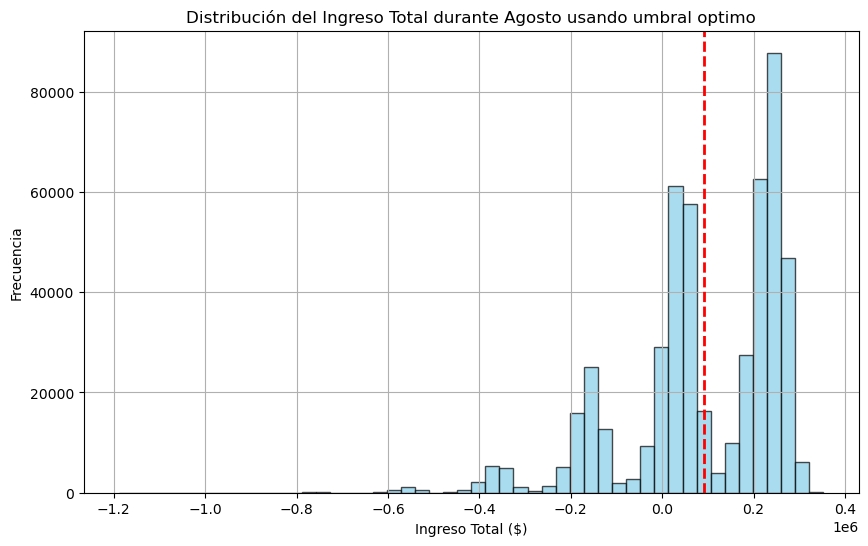

In [36]:
todos_ingresos_norte_agosto = []
todos_ingresos_sur_agosto = []
ingreso_total_agosto = []
for sim in range(M):
    ingresos_norte_agosto, roturas_norte_agosto, estado_norte_agosto, cashflows_norte_agosto,_ = simular_molino(trayectoria_norte[sim][213-1:243],mejor_K_norte,costo)
    ingresos_sur_agosto, roturas_sur_agosto, estado_sur_agosto, cashflows_sur_agosto,_ = simular_molino(trayectoria_sur[sim][213-1:243],mejor_K_sur,costo)
    ingreso_total_agosto.append(ingresos_norte_agosto + ingresos_sur_agosto)

media_agosto = np.mean(ingreso_total_agosto)
desviacion_agosto = np.std(ingreso_total_agosto)

plt.figure(figsize=(10, 6))
plt.hist(ingreso_total_agosto, bins=50, color='skyblue', alpha=0.7, edgecolor='black')
plt.axvline(media_agosto, color='red', linestyle='--', linewidth=2, label=f'Media: {media_agosto:.2f}')
plt.title('Distribución del Ingreso Total durante Agosto usando umbral optimo')
plt.xlabel('Ingreso Total ($)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [37]:

percentiles_agosto = np.percentile(ingreso_total_agosto, [5, 50, 95])

print(f"Ingreso medio en agosto: {media_agosto}")
print(f"Desviación estándar del ingreso en agosto: {desviacion_agosto}")
print(f"Percentiles 5%, 50%, 95%: {percentiles_agosto}")

Ingreso medio en agosto: 92098.08156883791
Desviación estándar del ingreso en agosto: 168401.5125749733
Percentiles 5%, 50%, 95%: [-197771.41821205   88426.71444567  274012.8580396 ]


Obsevando el grafico no podemos sacar una conclusion perfecta acerca de la distribucion pero podriamos decir lo siguente: 

- Valores Negativos y Positivos: Se observa una gran cantidad de casos con ingresos negativos, lo que implica que en muchos escenarios, los costos de mantenimiento o fallas superan los ingresos generados. Esto resalta que, bajo ciertas condiciones, operar los molinos puede resultar en pérdidas netas.

- Asimetría: La distribución no es simétrica; parece estar sesgada hacia los valores positivos, aunque la presencia significativa de ingresos negativos también indica que los resultados pueden variar ampliamente. Esta asimetría puede reflejar la naturaleza incierta y volátil de los ingresos, que dependen en gran parte de las condiciones del viento y la operación del molino.

- Variabilidad: La amplitud de la distribución sugiere una alta variabilidad en los ingresos, lo que podría ser atribuible a la aleatoriedad inherente del viento y las decisiones de apagado o encendido del molino según el umbral óptimo.

- Impacto de las Fallas: Los valores negativos muestran que las fallas y los costos asociados tienen un impacto significativo en los ingresos. Esto destaca la importancia de la gestión del mantenimiento y de tener un umbral de operación que minimice estos eventos.



### 9) Calculamos el número medio de roturas por año que sufre el molino bajo la estrategia óptima y cuántas si no se lo apaga nunca

In [38]:
roturas = []
for i in tqdm(range(M)):
    ingresos_norte, roturas_norte, estado_norte, cashflows_norte,apagados_norte = simular_molino(trayectoria_norte[sim],mejor_K_norte,costo)
    ingresos_sur, roturas_sur, estado_sur, cashflows_sur,apagados_sur = simular_molino(trayectoria_sur[sim],mejor_K_sur,costo)
    roturas.append(roturas_norte + roturas_sur)
roturas_promedio = np.mean(roturas)
error_estandar_optima = np.std(roturas, ddof=1) / np.sqrt(M)

print(f"Roturas promedio bajo la estrategia óptima: {roturas_promedio}")
print(f"Error estándar del estimador de roturas promedio copn estrategia optima: {error_estandar_optima}")
    

100%|█████████████████████████████████| 500000/500000 [04:18<00:00, 1931.87it/s]

Roturas promedio bajo la estrategia óptima: 6.566052
Error estándar del estimador de roturas promedio copn estrategia optima: 0.003526620356757201


In [39]:
roturas_naive = []
for i in tqdm(range(M)):
    _, roturas_norte_naive, _, _ = simular_molino_naive(trayectoria_norte[sim])
    _, roturas_sur_naive,_,_ = simular_molino_naive(trayectoria_sur[sim])
    roturas_naive.append(roturas_norte_naive + roturas_sur_naive)
roturas_promedio_naive = np.mean(roturas_naive)
error_estandar_naive = np.std(roturas_naive, ddof=1) / np.sqrt(M)
print(f"Roturas promedio bajo la estrategia naive: {roturas_promedio_naive}")
print(f"Error estándar del estimador de roturas promedio con estrategia naive: {error_estandar_naive}")

100%|█████████████████████████████████| 500000/500000 [04:35<00:00, 1813.92it/s]

Roturas promedio bajo la estrategia naive: 19.577722
Error estándar del estimador de roturas promedio con estrategia naive: 0.005884712723754634


### 10) Calculamos el número de días por año en los que cada molino está inactivo en promedio, ya sea por apagado o rotura, bajo la estrategia óptima

In [40]:
apagados_norte_ = []
apagados_sur_ = []
for i in tqdm(range(M)):
    _,_,_,_,apagados_norte = simular_molino(trayectoria_norte[sim],mejor_K_norte,costo)
    _,_,_,_,apagados_sur = simular_molino(trayectoria_sur[sim],mejor_K_sur,costo)
    apagados_norte_.append(apagados_norte)
    apagados_sur_.append(apagados_sur)
apagados_norte_promedio = np.mean(apagados_norte_)
error_standar_norte = np.std(apagados_norte_, ddof=1) / np.sqrt(M)
apagados_sur_promedio = np.mean(apagados_sur_)
error_standar_sur = np.std(apagados_sur_, ddof=1) / np.sqrt(M)
print(f"Apagados norte promedio bajo la estrategia óptima: {apagados_norte_promedio}")
print(f"Error estandar del estimador Apagados norte bajo la estrategia óptima: {error_standar_norte}")
print(f"Apagados sur promedio bajo la estrategia óptima: {apagados_sur_promedio}")
print(f"Error estandar del estimador Apagados sur bajo la estrategia óptima: {error_standar_sur}")

100%|█████████████████████████████████| 500000/500000 [04:15<00:00, 1954.31it/s]

Apagados norte promedio bajo la estrategia óptima: 143.8029
Error estandar del estimador Apagados norte bajo la estrategia óptima: 0.0023096549198985757
Apagados sur promedio bajo la estrategia óptima: 101.756184
Error estandar del estimador Apagados sur bajo la estrategia óptima: 0.0026647674792107915


### 11) Calclamos la probabilidad de que los dos molinos estén inactivos el 9 de julio, y también la prbabilidad de que los dos estén inactivos algún día del año

El 9 de julio es el dia 190 del año.

In [41]:

estados = []
for i in tqdm(range(M)):
    _,_, estado_norte, _,_ = simular_molino(trayectoria_norte[sim][0:190],mejor_K_norte,costo)
    _, _, estado_sur, _,_ = simular_molino(trayectoria_sur[sim][0:190],mejor_K_sur,costo)
    estado = 1 if estado_norte[-1] != 1 and estado_sur[-1] != 1 else 0 #si ninguno de los dos molinos esta activo el 7 de julio
    estados.append(estado)
proba_estimada_1 = np.mean(estados)
error_standar_1 = np.sqrt((proba_estimada_1*(1-proba_estimada_1))/M)
print(f"Probabilidad estimada de que los dos molinos esten inactivos el 9 de julio: {proba_estimada_1}")
print(f"Error estándar de la estimación: {error_standar_1}")

100%|█████████████████████████████████| 500000/500000 [02:15<00:00, 3695.40it/s]


Probabilidad estimada de que los dos molinos esten inactivos el 9 de julio: 3.6e-05
Error estándar de la estimación: 8.485128637799193e-06


Esto tiene sentido, ya que si vemos gráficos anteriors del promedio del viento, vemos que el promedio del viento en el 9 de Julio es aproximadamente 4, por lo que entonces seria muy poco probable que estén inactivos ambos molinos ese día.

In [42]:

estados_2 = []
for i in tqdm(range(M)):
    _,_, estado_norte, _,_ = simular_molino(trayectoria_norte[sim],mejor_K_norte,costo)
    _, _, estado_sur, _,_ = simular_molino(trayectoria_sur[sim],mejor_K_sur,costo)
    estado = any(estado_norte[j] != 1 and estado_sur[j] != 1 for j in range(len(estado_norte))) #si ninguno de los dos molinos esta activo el 7 de julio
    estados_2.append(estado)
proba_estimada_2 = np.mean(estados_2)
error_standar_2 = np.sqrt((proba_estimada_2*(1-proba_estimada_2))/M)
print(f"Probabilidad estimada de que los dos molinos esten inactivos en algun dia del año: {proba_estimada_2}")
print(f"Error estándar de la estimación: {error_standar_2}")

100%|█████████████████████████████████| 500000/500000 [04:20<00:00, 1919.29it/s]

Probabilidad estimada de que los dos molinos esten inactivos en algun dia del año: 1.0
Error estándar de la estimación: 0.0


Resultado sin sentido.

### 12) Calculamos la correlación entre los ingresos totales mensuales de mayo de los dos molinos

Los dias 121 a 152 del año inclusive pertenecen a Mayo.

Comentario: np.corrcoef te calcula la matriz de correlacion donde en las posiciones
[0, 1] y [1, 0] son la correlación entre los ingresos del norte y sur, que es lo que interesa y diagonal correlaciones entre la variable consigo misma que es 1. 

In [43]:
todos_ingresos_norte_mayo = []
todos_ingresos_sur_mayo = []
for sim in tqdm(range(M)):
    ingresos_norte_mayo, _, _, _,_ = simular_molino(trayectoria_norte[sim][120:151],mejor_K_norte,costo)
    ingresos_sur_mayo, _, _, _,_ = simular_molino(trayectoria_sur[sim][120:151],mejor_K_sur,costo)
    todos_ingresos_norte_mayo.append(ingresos_norte_mayo)
    todos_ingresos_sur_mayo.append(ingresos_sur_mayo)
    
correlacion = np.corrcoef(todos_ingresos_norte_mayo, todos_ingresos_sur_mayo)[0, 1]
print(f"La correlación entre los ingresos de mayo de los dos molinos es: {correlacion}")

100%|████████████████████████████████| 500000/500000 [00:25<00:00, 19830.83it/s]

La correlación entre los ingresos de mayo de los dos molinos es: 0.0026439504578205097


### 13) Vemos cuán sensible es el VAN del negocio al costo del arreglo de roturas y también verificamos si cambia el umbral si el costo del arreglo es de 250 mil dólares

In [44]:
epsilon = costo*0.06


sensibilidad = ((calcular_VAN_promedio(trayectoria_norte,mejor_K_norte,costo+epsilon) + calcular_VAN_promedio(trayectoria_sur,mejor_K_sur,costo+epsilon)) - (calcular_VAN_promedio(trayectoria_norte,mejor_K_norte,costo-epsilon) + calcular_VAN_promedio(trayectoria_sur,mejor_K_sur,costo-epsilon)))/(2*epsilon)
print(f"La sensibilidad en relacion al costo de rotura es de: {sensibilidad}")

100%|█████████████████████████████████| 500000/500000 [02:16<00:00, 3663.17it/s]

La sensibilidad en relacion al costo de rotura es de: -7.20743702058141


Podemos ver que tenemos una sensibilidad esperada de aproximadamente -7.2 aproximadamente
indicando que por cada unidad monetaria adicional en el costo de arreglo de las roturas, el Valor Actual Neto (VAN) del negocio se reduce en 7.2 unidades. Este valor refleja cómo los costos adicionales impactan negativamente en la rentabilidad del negocio.
Es decir que si los costos de reparacion aumentan en por ejemplo 50k, se espera que el van optimo baje su resultado en 50k*-7.2 = -360k lo cual impactaria de una forma bastante negativa en el VAN de la empresa.

In [45]:
costo_nuevo = 250000
mejor_VAN_norte = -np.inf
mejor_VAN_sur = -np.inf
mejor_K_norte_nuevo = None
mejor_K_sur_nuevo = None
K_values = np.linspace(5, 8, 5) 

for K in K_values:
    VAN_actual_norte = calcular_VAN_promedio(trayectoria_norte,K,costo_nuevo)
    VAN_actual_sur = calcular_VAN_promedio(trayectoria_sur,K,costo_nuevo)
    print(f"VAN para molino norte con  K = {K}: {VAN_actual_norte}")
    print(f"VAN para molino sur con  K = {K}: {VAN_actual_sur}")
    if VAN_actual_norte > mejor_VAN_norte:
        mejor_VAN_norte = VAN_actual_norte
        mejor_K_norte_nuevo = K
    if VAN_actual_sur > mejor_VAN_sur:
        mejor_VAN_sur = VAN_actual_sur
        mejor_K_sur_nuevo = K

print(f"Mejor K encontrado para Norte: {mejor_K_norte} con un VAN de {mejor_VAN_norte}")
print(f"Mejor K encontrado para Sur: {mejor_K_sur} con un VAN de {mejor_VAN_sur}")
if mejor_K_norte_nuevo != mejor_K_norte and mejor_K_sur_nuevo != mejor_K_sur: 
    print(f'Cambio el umbral optimo y es {mejor_K_norte_nuevo} para el molino norte y {mejor_K_sur_nuevo} ')

100%|█████████████████████████████████| 500000/500000 [01:52<00:00, 4428.90it/s]


VAN para molino norte con  K = 5.0: 187514.7869617973
VAN para molino sur con  K = 5.0: 187519.0074202421


100%|█████████████████████████████████| 500000/500000 [01:59<00:00, 4167.69it/s]


VAN para molino norte con  K = 5.75: 233555.83176722343
VAN para molino sur con  K = 5.75: 234898.01363862125


100%|█████████████████████████████████| 500000/500000 [02:07<00:00, 3935.35it/s]


VAN para molino norte con  K = 6.5: 249989.20403618627
VAN para molino sur con  K = 6.5: 249947.00102504715


100%|█████████████████████████████████| 500000/500000 [02:14<00:00, 3728.37it/s]


VAN para molino norte con  K = 7.25: 224543.11136919423
VAN para molino sur con  K = 7.25: 222972.12294575677


100%|█████████████████████████████████| 500000/500000 [02:22<00:00, 3517.97it/s]

VAN para molino norte con  K = 8.0: 154855.27795516286
VAN para molino sur con  K = 8.0: 156690.6906216493
Mejor K encontrado para Norte: 7.222222222222222 con un VAN de 249989.20403618627
Mejor K encontrado para Sur: 7.222222222222222 con un VAN de 249947.00102504715
Cambio el umbral optimo y es 6.5 para el molino norte y 6.5 


Vemos que si el costo de arreglo fuera de 250.000 dólares, el umbral óptimo se ve modificado, lo cual tiene sentido, ya que uno pensaría que si es mas caro arreglarlo, seria mas precavido y pondria un umbral de apagado menor

### 14) Vemos cuán sensible es el VAN del negocio a la media estacional del viento (theta)

In [47]:
def theta_epsilon(dia,eps):
    theta = 6 + 2*np.cos(2*np.pi*dia/365)
    return theta + eps

In [49]:
from tqdm import tqdm
M = 500000
eps = 0.35
S0 = df['regional wind'][0]
trayectoria_norte_epsilon = np.zeros((M, 365))
trayectoria_sur_epsilon = np.zeros((M, 365))
trayectoria_norte_epsilon_negado = np.zeros((M, 365))
trayectoria_sur_epsilon_negado = np.zeros((M, 365))
trayectoria_norte_epsilon[:,0] = S0
trayectoria_sur_epsilon[:,0] = S0
trayectoria_norte_epsilon_negado[:,0] = S0
trayectoria_sur_epsilon_negado[:,0] = S0
trayectoria_dif_epsilon = np.zeros((M, 365))
for i in tqdm(range(M)):
    for j in range(1,365):
        Z = np.random.normal(0, 1)
        W = np.random.normal(0, 1)
        trayectoria_dif_epsilon[i][j] =  trayectoria_dif_epsilon[i][j-1] - beta*trayectoria_dif_epsilon[i][j-1]*1/365+ gamma*np.sqrt(1/365)*W
        trayectoria_norte_epsilon[i][j] =  trayectoria_norte_epsilon[i][j-1] + kappa*(theta_epsilon(j,eps) - trayectoria_norte_epsilon[i][j-1])*1/365 + sigma *np.sqrt(1/365) * Z + trayectoria_dif_epsilon[i][j]/2
        trayectoria_sur_epsilon[i][j] =  trayectoria_sur_epsilon[i][j-1] + kappa*(theta_epsilon(j,eps)- trayectoria_sur_epsilon[i][j-1])*1/365 + sigma *np.sqrt(1/365) * Z - trayectoria_dif_epsilon[i][j]/2
        trayectoria_norte_epsilon_negado[i][j] =  trayectoria_norte_epsilon_negado[i][j-1] + kappa*(theta_epsilon(j,-eps) - trayectoria_norte_epsilon_negado[i][j-1])*1/365 + sigma *np.sqrt(1/365) * Z + trayectoria_dif_epsilon[i][j]/2
        trayectoria_sur_epsilon_negado[i][j] =  trayectoria_sur_epsilon_negado[i][j-1] + kappa*(theta_epsilon(j,-eps) - trayectoria_sur_epsilon_negado[i][j-1])*1/365 + sigma *np.sqrt(1/365) * Z - trayectoria_dif_epsilon[i][j]/2

100%|██████████████████████████████████| 500000/500000 [22:51<00:00, 364.43it/s]


In [50]:
sensibilidad_theta = ((calcular_VAN_promedio(trayectoria_norte_epsilon,mejor_K_norte,costo) + calcular_VAN_promedio(trayectoria_sur_epsilon,mejor_K_sur,costo)) - (calcular_VAN_promedio(trayectoria_norte_epsilon_negado,mejor_K_norte,costo) + calcular_VAN_promedio(trayectoria_sur_epsilon_negado,mejor_K_sur,costo)))/(2*eps)
print(f"La sensibilidad en relacion a la media estacional, es decir theta: {sensibilidad_theta}")



100%|█████████████████████████████████| 500000/500000 [02:18<00:00, 3601.96it/s]

La sensibilidad en relacion a la media estacional, es decir theta: -118377.2078405191
